<a href="https://colab.research.google.com/github/MoriamAkterSwarna/AI-ML/blob/main/Moriam_Akter_Swarna_Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests
from io import  StringIO

res  = requests.get('https://raw.githubusercontent.com/phitronio/Python-for-ML/refs/heads/main/final-employee-ds.csv')

df = pd.read_csv(StringIO(res.text))

df

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3
3,104,Employee_4,42,Male,Marketing,12,60056.0,48,76,2012-10-12,M,2,25,4
4,105,Employee_5,40,Female,Finance,19,85543.0,36,97,2014-12-30,XL,8,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,196,Employee_96,58,Female,Marketing,9,67350.0,47,65,2021-06-20,S,9,25,2
96,197,Employee_97,56,Male,IT,12,133008.0,45,77,2011-11-03,XL,5,12,2
97,198,Employee_98,43,Female,Management,1,134297.0,45,64,2015-05-24,M,3,39,3
98,199,Employee_99,48,Male,Marketing,1,65351.0,36,84,2021-05-19,L,5,17,2


**Answer to the Question No. 1**

In [ ]:
data = np.array(df["TrainingHours"], dtype=float)

meanValue = np.mean(data)
stdValue = np.std(data)


print("Mean: ", meanValue)
print("Standard Deviation: ", stdValue)


Mean:  24.19
Standard Deviation:  13.842467265628624


**Answer To The question No. 2**

In [ ]:


median_by_dept = df.groupby('Department')['Salary'].transform('median')
df['Salary'] = df['Salary'].fillna(median_by_dept)


filtered_sum = df[(df['ExperienceYears'] > 12) & (df['ProjectCount'] > 5)]['Salary'].sum()

print("Total Salary Sum:", filtered_sum)

# print(df['Salary'])


Total Salary Sum: 1985775.5


**Answer to the Question No. 3**

In [ ]:
filter_data = df[
    ((df['Department'] == 'IT') | (df['Department'] == 'Finance'))
    &
    (df['Age'].between(30, 45))
     &
    (df['PerformanceScore'] > 88)
]

res_value = filter_data[['Name', 'Department', 'Salary', 'PerformanceScore']].sort_values(by='Salary', ascending=False)
print(res_value)


           Name Department    Salary  PerformanceScore
94  Employee_95         IT  140386.0                94
88  Employee_89    Finance  126027.0                92
4    Employee_5    Finance   85543.0                97
32  Employee_33         IT   83919.0                98
55  Employee_56    Finance   49540.0                94


**Answer to the Question No. 4**

In [ ]:
df['SalaryPerHour'] = df['Salary'] / (df['WorkHoursPerWeek'] * 4)

top_5 = df[['Name', 'SalaryPerHour']].sort_values(by='SalaryPerHour', ascending=False).head(5)
print(top_5)


           Name  SalaryPerHour
46  Employee_47     981.278571
27  Employee_28     971.292857
31  Employee_32     967.392857
79  Employee_80     945.335526
80  Employee_81     937.858974


**Answer to the Question No. 5**

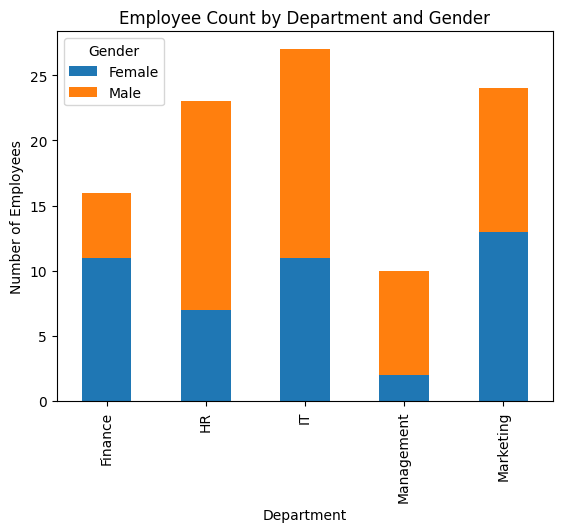

In [ ]:
group_dept_gen = df.groupby(['Department', 'Gender']).size().unstack(fill_value=0)


group_dept_gen.plot(kind='bar', stacked=True)

plt.title("Employee Count by Department and Gender")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.legend(title="Gender")
plt.show()